In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [61]:
df = pd.read_csv("Algerian_forest_fires__cleaned_dataset_UPDATE.csv")

In [62]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [63]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [64]:
## Drop day month and year 
df.drop(['day', 'month', 'year'], axis =1, inplace= True)

In [65]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [66]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [67]:
## Encoding 
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0 ,1)

In [68]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [69]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [70]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [71]:
## DIvide feature into Independet and dependent features
X=df.drop('FWI',axis =1)
y= df['FWI']

In [72]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [73]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [74]:
#Train test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=25)

In [75]:
X_test.shape,X_train.shape

((61, 11), (182, 11))

In [76]:
## Feature Selection based on COreleation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.630140,-0.239083,-0.287945,0.657253,0.428417,0.320360,0.559907,0.399878,0.490835,0.260915
RH,-0.630140,1.000000,0.183055,0.185942,-0.635162,-0.341204,-0.151222,-0.635778,-0.279614,-0.400224,-0.399841
Ws,-0.239083,0.183055,1.000000,0.064732,-0.114065,0.069681,0.136998,0.086493,0.099691,-0.023240,-0.116734
Rain,-0.287945,0.185942,0.064732,1.000000,-0.540855,-0.318298,-0.307697,-0.353328,-0.324029,-0.377175,0.022707
FFMC,0.657253,-0.635162,-0.114065,-0.540855,1.000000,0.592533,0.471325,0.717918,0.570692,0.744386,0.209713
DMC,0.428417,-0.341204,0.069681,-0.318298,0.592533,1.000000,0.878556,0.653764,0.981498,0.578766,0.106689
DC,0.320360,-0.151222,0.136998,-0.307697,0.471325,0.878556,1.000000,0.462378,0.942598,0.479518,-0.171598
ISI,0.559907,-0.635778,0.086493,-0.353328,0.717918,0.653764,0.462378,1.000000,0.608627,0.728417,0.224606
BUI,0.399878,-0.279614,0.099691,-0.324029,0.570692,0.981498,0.942598,0.608627,1.000000,0.570350,-0.006119
Classes,0.490835,-0.400224,-0.023240,-0.377175,0.744386,0.578766,0.479518,0.728417,0.570350,1.000000,0.144138


In [77]:
def correlation(dataset,threshold):
    col_corr =set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [78]:
corr_features=correlation(X_train,0.85)

In [79]:
X_train.drop(corr_features, axis=1,inplace= True)
X_test.drop(corr_features,axis=1,inplace=True)

In [80]:
X_test.shape,X_train.shape 

((61, 9), (182, 9))

## Feature Scaling or Standardization


In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Box plot to understand the effect of standared scaler

Text(0.5, 1.0, 'X_train After Scaling')

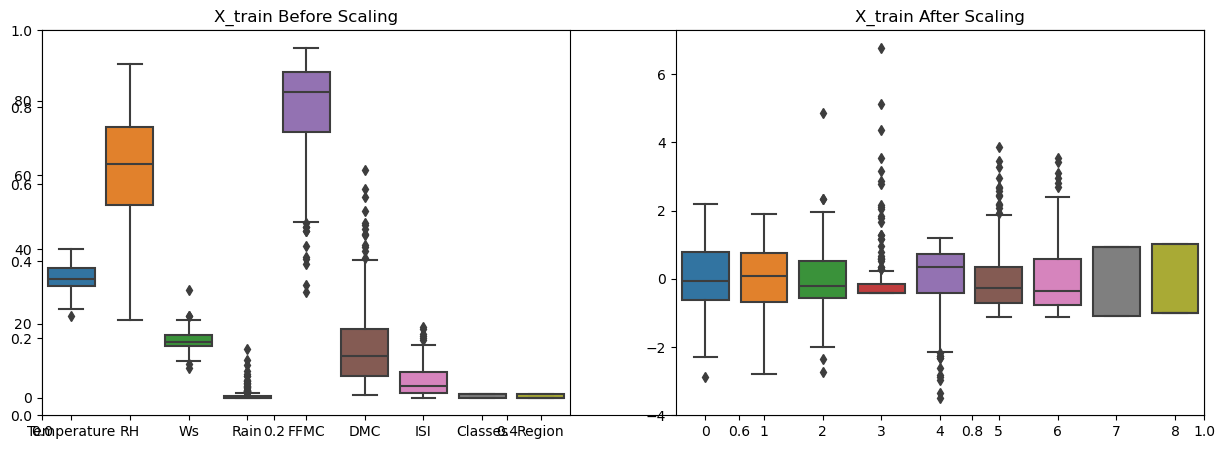

In [82]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data= X_train)
plt.title('X_train Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

## Linear Regression Model

MEAN Absoulted Errror 0.706204418013629
R2 Score  0.9844167121901739


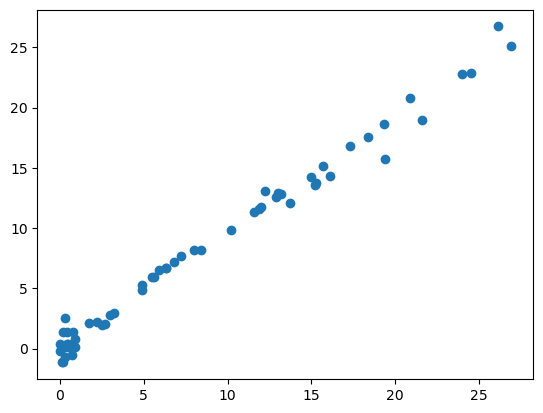

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
linreg= LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("MEAN Absoulted Errror" ,mae)
print("R2 Score ",score)
plt.scatter(y_test,y_pred)

## Lasso Regression 

MAE--> 1.2915095057603423
score--> 0.9505509308420691


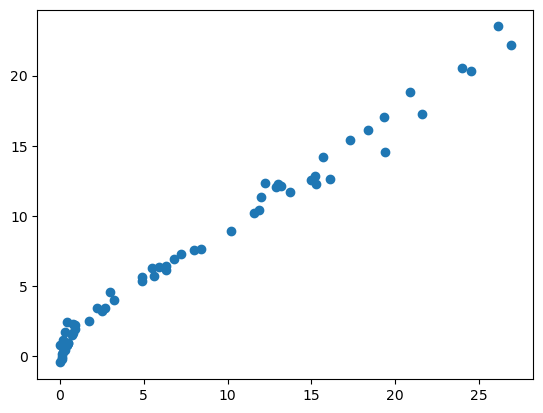

In [84]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score
lasso= Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("MAE-->" ,mae)
print("score-->",score)
plt.scatter(y_test,y_pred)

## Ridge Regression 

MAE--> 0.7200187655033361
score--> 0.9838565795034435


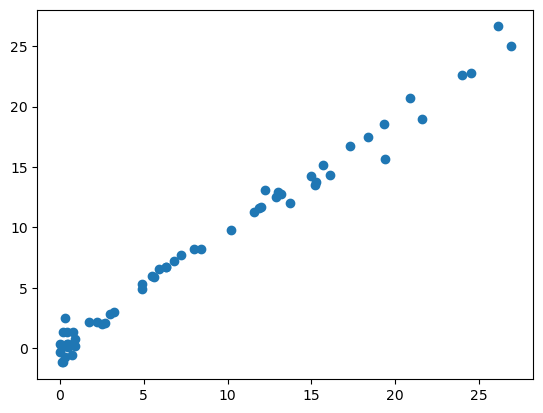

In [85]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("MAE-->" ,mae)
print("score-->",score)
plt.scatter(y_test,y_pred)

## Elasticnet Regression

MAE -->  1.9480868028345302
R2_score --> 0.8896377636269518


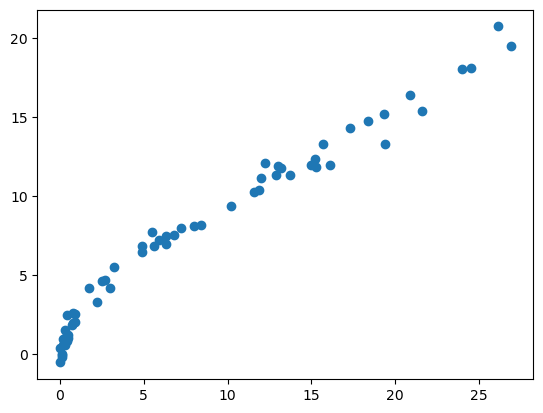

In [86]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score
elastic = ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score= r2_score(y_test,y_pred)
print("MAE --> ", mae)
print("R2_score -->",score)
plt.scatter(y_test,y_pred)

## Lasso Cross Validation 

In [87]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)


LassoCV(cv=5)

In [88]:
lassocv.alpha_

0.030474970583978106

In [89]:
import pickle
pickle.dump(scaler,open("scaler.pkl",'wb'))
pickle.dump(ridge,open("ridge.pkl","wb"))